# Models Training 4
In this notebook we are exploring the TSME clustering methods


t-SNE (t-distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique used for visualizing high-dimensional data in 2D or 3D. It focuses on preserving local relationships, ensuring that points close together in high-dimensional space remain close in the reduced space.

Key Points:  
- Non-linear: Captures complex patterns in the data.
- Perplexity: Controls the balance between local and global structure.
- Use Case: Primarily for visualizing clusters in data, not for classification or predictive modeling.
- Limitation: Computationally intensive and better suited for small datasets.

In short, t-SNE helps to visualize complex data in fewer dimensions, showing clusters or patterns not easily seen in higher dimensions.

## Imports

In [ ]:
!pip install -q spacy gensim nltk
!python -m spacy download en_core_web_sm
!pip install xgboost

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# import custom helper module
import importlib
import helpers
importlib.reload(helpers)


## Load dataset

In [5]:
X_train, X_test, y_train, y_test = helpers.load_dataset("training_data_clean.csv")

# print message
helpers.print_text(X_train, y_train)

X_train.shape, X_test.shape

Loading split dataset from pickle files
----------------------------------------------------------------------------------------------------
[4184] sarah palin lose sht rage whine hillary charge fbi --> 0
----------------------------------------------------------------------------------------------------


((27123,), (6781,))

In [6]:
# vectorize data using tfidf
X_train_vec, X_test_vec = helpers.vectorize_tfidf(X_train, X_test)

## Fit TSNE on train set

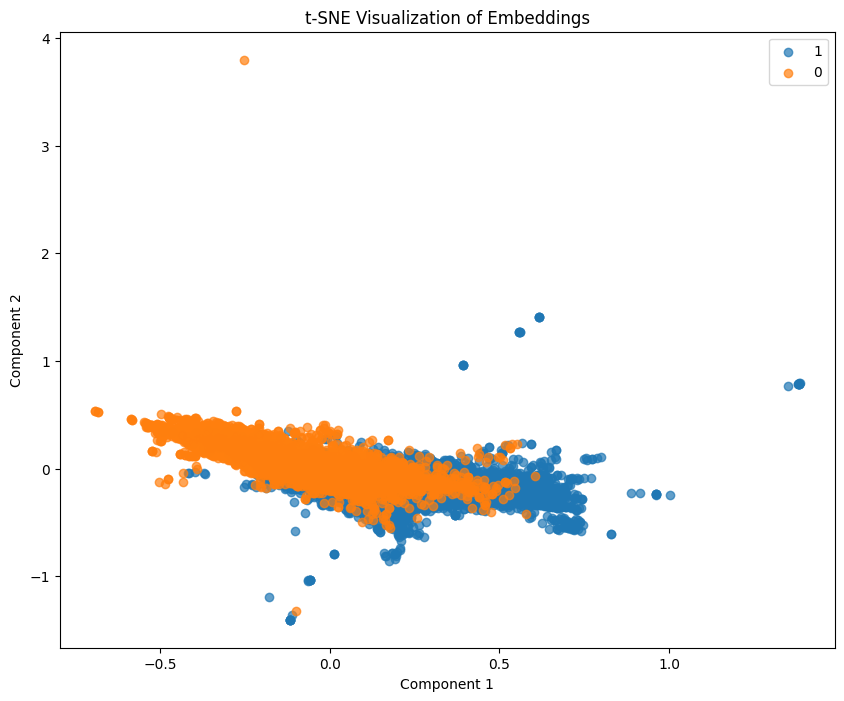

In [12]:
# Step 1: Initialize t-SNE model
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=250, early_exaggeration=10, method='barnes_hut', angle=0.5)

# Step 2: Fit and transform the data (reduce to 2D)
X_train_tsne = tsne.fit_transform(X_train_vec)

# Step 3: Create a DataFrame for easier visualization
df_tsne = pd.DataFrame(X_train_tsne, columns=['Component 1', 'Component 2'])
df_tsne['label'] = y_train  # Optionally add the labels if you want to color by class

# Step 4: Visualize the results with matplotlib
plt.figure(figsize=(10, 8))

# If you have labels (e.g., real/fake news), color the points by label
unique_labels = df_tsne['label'].unique()

for label in unique_labels:
    subset = df_tsne[df_tsne['label'] == label]
    plt.scatter(subset['Component 1'], subset['Component 2'], label=label, alpha=0.7)

plt.title('t-SNE Visualization of Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

# Save t-SNE result as a CSV
df_tsne = pd.DataFrame(X_train_tsne, columns=['Component 1', 'Component 2'])
df_tsne.to_csv('X_train_tsne.csv', index=False)

## Fit TSNE on test set

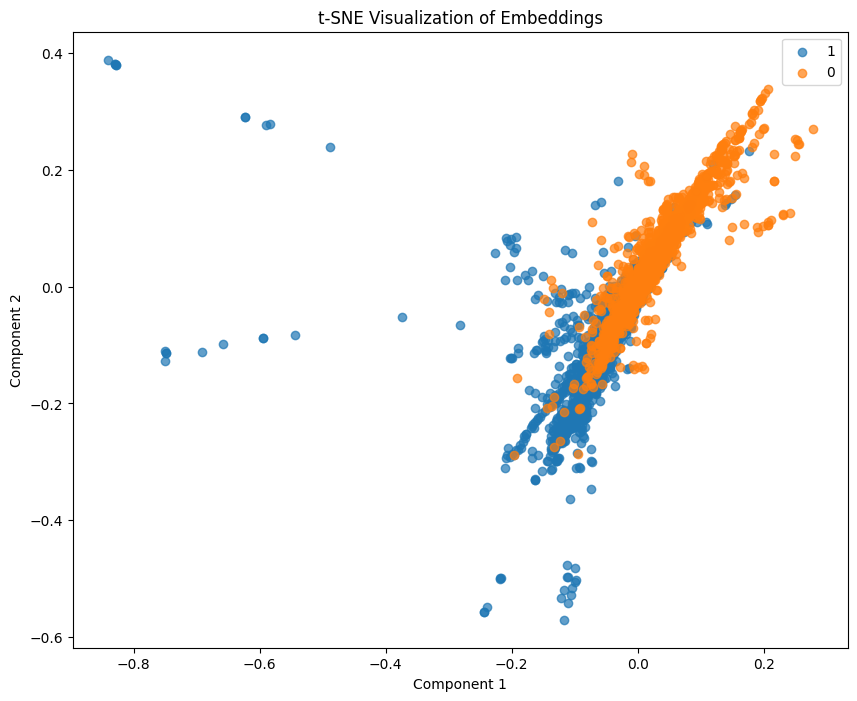

In [7]:
# Step 1: Initialize t-SNE model
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=250, early_exaggeration=10, method='barnes_hut', angle=0.5)

# Step 2: Fit and transform the data (reduce to 2D)
X_test_tsne = tsne.fit_transform(X_test_vec)

# Step 3: Create a DataFrame for easier visualization
df_tsne = pd.DataFrame(X_test_tsne, columns=['Component 1', 'Component 2'])
df_tsne['label'] = y_test  # Optionally add the labels if you want to color by class

# Step 4: Visualize the results with matplotlib
plt.figure(figsize=(10, 8))

# If you have labels (e.g., real/fake news), color the points by label
unique_labels = df_tsne['label'].unique()

for label in unique_labels:
    subset = df_tsne[df_tsne['label'] == label]
    plt.scatter(subset['Component 1'], subset['Component 2'], label=label, alpha=0.7)

plt.title('t-SNE Visualization of Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

# Save t-SNE result as a CSV
df_tsne = pd.DataFrame(X_test_tsne, columns=['Component 1', 'Component 2'])
df_tsne.to_csv('X_test_tsne.csv', index=False)

## Reload saved clusterings

In [13]:
X_train_tsne = pd.read_csv('X_train_tsne.csv').values  # Convert back to NumPy array if needed
X_test_tsne = pd.read_csv('X_test_tsne.csv').values  # Convert back to NumPy array if needed
X_train_tsne.shape, X_test_tsne.shape

((27123, 2), (6781, 2))

## Use clusterings as inputs to various models

In [16]:
# Step 1: Load t-SNE transformed data
X_train_tsne = pd.read_csv('X_train_tsne.csv')
X_test_tsne = pd.read_csv('X_test_tsne.csv')

# Step 2: Train a Logistic Regression model using the 2D t-SNE features
logreg = LogisticRegression()
logreg.fit(X_train_tsne, y_train)

# Step 3: Predict on the test set
y_pred = logreg.predict(X_test_tsne)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7953
Precision: 0.8213
Recall: 0.7431
F1 Score: 0.7802


In [18]:
# Step 1: Load the t-SNE transformed data
X_train_tsne = pd.read_csv('X_train_tsne.csv')
X_test_tsne = pd.read_csv('X_test_tsne.csv')

# Step 2: Train a Random Forest classifier on the t-SNE embeddings
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf.fit(X_train_tsne, y_train)

# Step 3: Predict on the test set
y_pred = rf.predict(X_test_tsne)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7592
Precision: 0.8522
Recall: 0.6140
F1 Score: 0.7138


In [19]:
# Step 1: Train an SVM classifier
svm = SVC(kernel='linear', random_state=42)  # You can try 'rbf' or 'poly' for more complex kernels
svm.fit(X_train_tsne, y_train)

# Step 2: Predict on the test set
y_pred = svm.predict(X_test_tsne)

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7997
Precision: 0.8272
Recall: 0.7464
F1 Score: 0.7847


In [21]:
# Step 1: Train a Gradient Boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_tsne, y_train)

# Step 2: Predict on the test set
y_pred = gb.predict(X_test_tsne)

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7848
Precision: 0.8521
Recall: 0.6776
F1 Score: 0.7549


In [22]:
# Convert to DMatrix for better performance with XGBoost
dtrain = xgb.DMatrix(X_train_tsne, label=y_train)
dtest = xgb.DMatrix(X_test_tsne, label=y_test)

# Set parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train the model
xgboost_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict on the test set
y_pred_probs = xgboost_model.predict(dtest)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


[19:04:42] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Accuracy: 0.7595


In [23]:
# Step 1: Train an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=200, random_state=42)
mlp.fit(X_train_tsne, y_train)

# Step 2: Predict on the test set
y_pred = mlp.predict(X_test_tsne)

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7820
Precision: 0.8601
Recall: 0.6619
F1 Score: 0.7481


In [24]:
# Step 1: Train an AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train_tsne, y_train)

# Step 2: Predict on the test set
y_pred = adaboost.predict(X_test_tsne)

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7897
Precision: 0.8599
Recall: 0.6809
F1 Score: 0.7600
